In [12]:
from recbole.quick_start import run_recbole

from recbole.config import Config
from recbole.data import (
    create_dataset,
    data_preparation,
)
from recbole.data.transform import construct_transform
from recbole.utils import (
    init_logger,
    get_model,
    get_trainer,
    init_seed,
    set_color,
    get_flops,
    get_environment,
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.size': 8})

In [2]:
model = 'BPR'
dataset = 'ml-100k'

config_dict = {
    # 'normalize_field': None,
    'normalize_all': False,
    'train_batch_size': 1024,
    'eval_batch_size': 1024,
    'load_col': {"inter": ['user_id', 'item_id', 'timestamp']},
    'train_neg_sample_args': {
        'distribution': 'uniform',
        'sample_num': 30,
        'dynamic': False,
        'candidate_num': 0,
    },
    'eval_args': {
        "order": "TO",
        "split": { "LS": "valid_and_test" },
        "group_by": None,
        'mode': "full"
    },
    # 'train_neg_sample_args': None
}

config = Config(
    model=model,
    dataset=dataset,

    config_dict=config_dict,
)

dataset = create_dataset(config)

# run_recbole(model=model, dataset=dataset, config_dict=config_dict)

dataset.inter_feat['timestamp']

/home/hoanghu/miniforge3/envs/py/lib/python3.10/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/hoanghu/miniforge3/envs/py/lib/python3.10/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

0        881250949.0
1        891717742.0
2        878887116.0
3        880606923.0
4        886397596.0
            ...     
99995    880175444.0
99996    879795543.0
99997    874795795.0
99998    882399156.0
99999    879959583.0
Name: timestamp, Length: 100000, dtype: float64

In [3]:
df = dataset.inter_feat.copy()

In [4]:
df.head()

,user_id,item_id,timestamp
0,1,1,881250949.0
1,2,2,891717742.0
2,3,3,878887116.0
3,4,4,880606923.0
4,5,5,886397596.0


In [17]:
user_max_ts = df.groupby('user_id')['timestamp'].max()
user_min_ts = df.groupby('user_id')['timestamp'].min()

df_user = pd.DataFrame(
    {
        'max': user_max_ts,
        'min': user_min_ts,
    },
    index=user_max_ts.index
)

df_user.head()

,max,min
user_id,,
1,881252305.0,881250949.0
2,891719859.0,879022858.0
3,878888251.0,878886261.0
4,880609193.0,880601904.0
5,886397905.0,886397478.0


In [11]:
df_user.reset_index().melt(id_vars='user_id', va)

<Axes: xlabel='mean', ylabel='Count'>

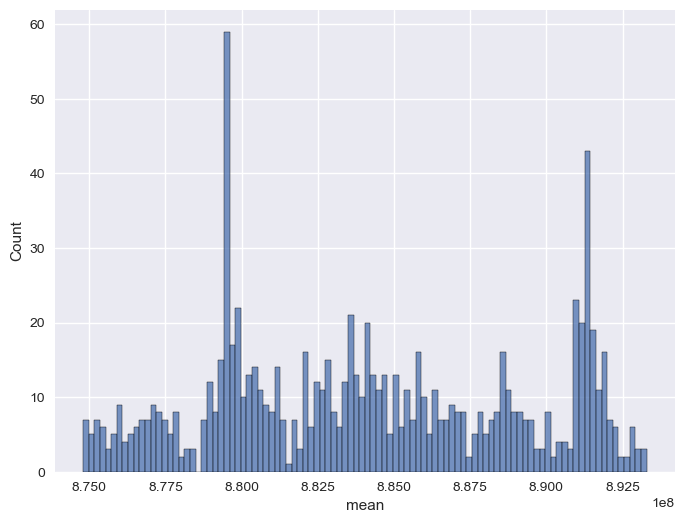

In [14]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

sns.histplot(df_user['mean'], bins=100)

In [16]:
cutoff = int((user_max_ts.quantile(0.5) + user_min_ts.quantile(0.5)) / 2)
print(cutoff)

len(df_user[
    (df_user['min'] <= cutoff)
    & (df_user['max'] >= cutoff)
])

883696486


137